In [27]:
from lib.ekyn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [28]:
ids = get_ekyn_ids()

In [29]:
f1s = []
for id in ids:
    X,y = load_psd_label_pair_windowed(id)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,shuffle=True,stratify=y,random_state=0)
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    f1s.append(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

In [31]:
unwindowed = [0.7387042382307384,
 0.6921269488944648,
 0.713224007841065,
 0.7967134136442952,
 0.7819448122101197,
 0.7861913967390391,
 0.7522725206799382,
 0.6626612919233189,
 0.6192066596459554,
 0.7892790143989009,
 0.8452342047930284,
 0.7613472311887387,
 0.6651793439710719,
 0.7587367544065193,
 0.7976709961468238,
 0.703964398790572]

In [32]:
f1s

[0.8201030382236443,
 0.7478601390941678,
 0.7063576979545744,
 0.8391355912874902,
 0.8099504805595875,
 0.8467561564420203,
 0.7872753730033756,
 0.6759710916602731,
 0.6304457827107637,
 0.8503204617964789,
 0.8733672762137697,
 0.8289997700653554,
 0.774872628201087,
 0.8730367921827051,
 0.8757859752293146,
 0.7486276307454428]

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch


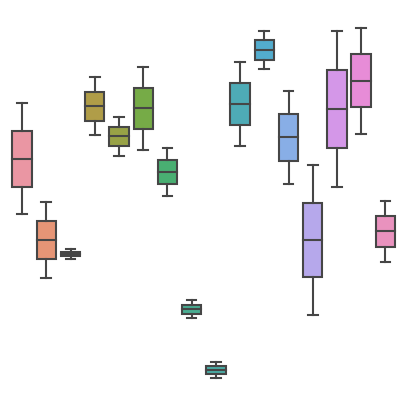

In [66]:
plt.figure(figsize=(5,5))
sns.boxplot(data=pd.DataFrame([f1s,unwindowed]))
plt.axis('off')
plt.savefig('box.jpg',dpi=500)

<AxesSubplot:>

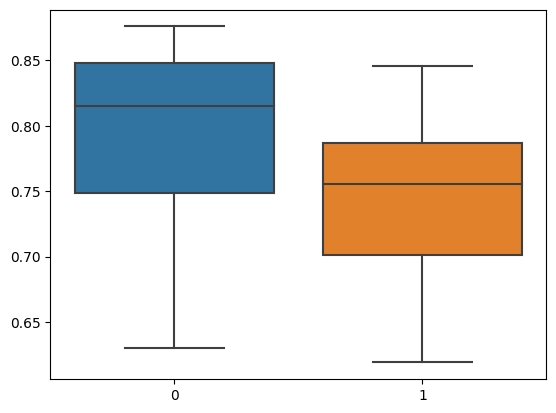

In [61]:
sns.boxplot(data=pd.DataFrame([f1s,unwindowed]).T)

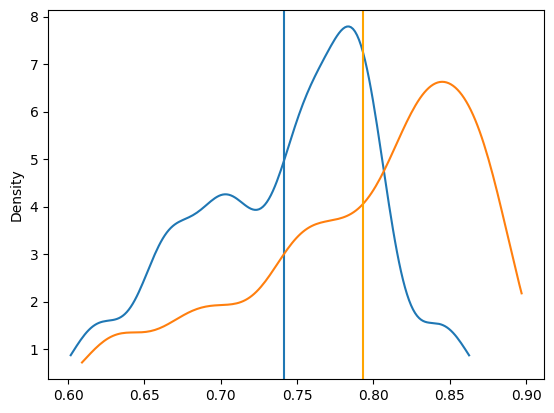

In [55]:
sns.kdeplot(unwindowed,bw_adjust=.5,cut=1)
plt.axvline(torch.Tensor(unwindowed).mean())
sns.kdeplot(f1s,bw_adjust=.5,cut=1)
plt.axvline(torch.Tensor(f1s).mean(),color='orange')
